In [73]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import sys
from IPython.display import clear_output
import os
from sklearn.metrics import mean_squared_error
np.set_printoptions(threshold=sys.maxsize)

In [74]:
# image = np.genfromtxt('mat.csv', delimiter=';')
# print(image)
# h,w = image.shape
# imageG = np.zeros([h,w])
# imageG= cv2.copyMakeBorder(image,1,1,1,1,cv2.BORDER_REFLECT)
# print(imageG)

In [75]:
# Une fonction pour detecter le visage dans une image donnée en entrée
def getFace(img):
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(img, 1.4, 4)
    for (x, y, w, h) in faces:
        faces = img[y:y + h, x:x + w]
        cv2.imwrite('Images/face.jpg', faces)
    face = cv2.imread('Images/face.jpg',0)
    face = cv2.resize(face,(128,128),interpolation = cv2.INTER_AREA)
    os.remove('Images/face.jpg')
    return face

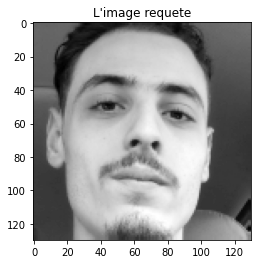

In [76]:
# On lit l'image requete et on detect le visage
img_path = 'Images/1.jpg'
img = cv2.imread(img_path,0)
plt.imshow(img,cmap='gray')
img = getFace(img)
h,w = img.shape[:2]
img = cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_REFLECT)
height,width = img.shape[:2]
plt.title("L'image requete")
plt.imshow(img,cmap='gray')

Text(0.5, 1.0, 'img8')

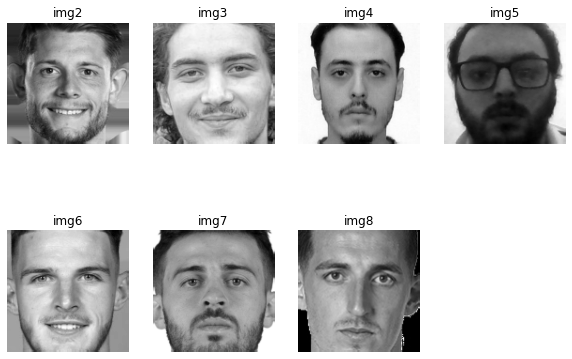

In [77]:
# On lit les images pour trouver la plus similaire a l'image requete
# Pour chaque Image,on detect le visage et on duplique les bordures
fig = plt.figure(figsize=(10, 7))
rows = 2
cols = 4

img_path = 'Images/2.jpg'
img2 = cv2.imread(img_path,0)
img2 = getFace(img2)
img2 = cv2.copyMakeBorder(img2,1,1,1,1,cv2.BORDER_REFLECT)
fig.add_subplot(rows, cols, 1)
plt.imshow(img2,cmap='gray')
plt.axis('off')
plt.title("img2")

img_path = 'Images/3.jpg'
img3 = cv2.imread(img_path,0)
img3 = getFace(img3)
img3 = cv2.copyMakeBorder(img3,1,1,1,1,cv2.BORDER_REFLECT)
fig.add_subplot(rows, cols, 2)
plt.imshow(img3,cmap='gray')
plt.axis('off')
plt.title("img3")

img_path = 'Images/4.jpg'
img4 = cv2.imread(img_path,0)
img4 = getFace(img4)
img4 = cv2.copyMakeBorder(img4,1,1,1,1,cv2.BORDER_REFLECT)
fig.add_subplot(rows, cols, 3)
plt.imshow(img4,cmap='gray')
plt.axis('off')
plt.title("img4")

img_path = 'Images/5.jpg'
img5 = cv2.imread(img_path,0)
img5 = getFace(img5)
img5 = cv2.copyMakeBorder(img5,1,1,1,1,cv2.BORDER_REFLECT)
fig.add_subplot(rows, cols, 4)
plt.imshow(img5,cmap='gray')
plt.axis('off')
plt.title("img5")

img_path = 'Images/6.jpg'
img6 = cv2.imread(img_path,0)
img6 = getFace(img6)
img6 = cv2.copyMakeBorder(img6,1,1,1,1,cv2.BORDER_REFLECT)
fig.add_subplot(rows, cols, 5)
plt.imshow(img6,cmap='gray')
plt.axis('off')
plt.title("img6")

img_path = 'Images/7.jpg'
img7 = cv2.imread(img_path,0)
img7 = getFace(img7)
img7 = cv2.copyMakeBorder(img7,1,1,1,1,cv2.BORDER_REFLECT)
fig.add_subplot(rows, cols, 6)
plt.imshow(img7,cmap='gray')
plt.axis('off')
plt.title("img7")

img_path = 'Images/8.jpg'
img8 = cv2.imread(img_path,0)
img8 = getFace(img8)
img8 = cv2.copyMakeBorder(img8,1,1,1,1,cv2.BORDER_REFLECT)
fig.add_subplot(rows, cols, 7)
plt.imshow(img8,cmap='gray')
plt.axis('off')
plt.title("img8")

In [78]:
#gradient x
def gradientX(image,h,w,height,width):
    gx = np.zeros([h,w])
    for p in range(1,width-1) :
        for l in range(1,height-1) :
            gx[l-1,p-1] = int(image[l+1,p]) - int(image[l-1,p])
    return gx

#gradient y
def gradientY(image,h,w,height,width):
    gy = np.zeros([h,w])
    for l in range(1,height-1) :
        for p in range(1,width-1) :
            gy[l-1,p-1] = int(image[l,p+1]) - int(image[l,p-1])
    return gy

#Magnitude
def magnitude(gx,gy,h,w):
    m = np.zeros([h,w])
    for l in range(h) :
        for p in range(w) :
            m[l,p]= math.sqrt( gx[l,p]**2 + gy[l,p]**2 )
    return m

#direction
def direction(gx,gy,h,w):
    d = np.zeros([h,w])
    for l in range(h) :
        for p in range(w) :
            # d[l,p]= math.floor(math.degrees(math.atan( gy[l,p] / gx[l,p])))
            d[l,p]= math.floor(math.degrees(np.arctan2( gy[l,p],gx[l,p])))
            if d[l,p] < 0 :
                d[l,p] %= 360
    return d

Text(0.5, 1.0, 'img8')

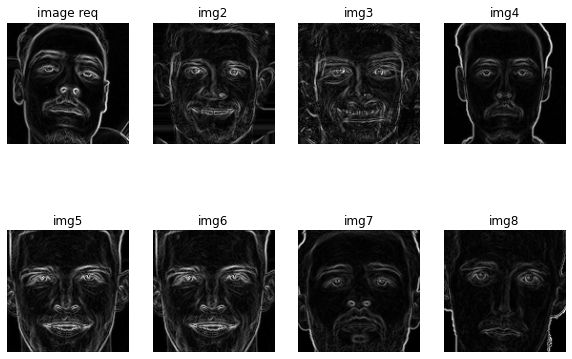

In [79]:
fig = plt.figure(figsize=(10, 7))
rows = 2
cols = 4

gx = gradientX(img,h,w,height,width)
gy = gradientY(img,h,w,height,width)
mod = magnitude(gx,gy,h,w)
d = direction(gx,gy,h,w)
fig.add_subplot(rows, cols, 1)
plt.imshow(mod,cmap='gray')
plt.axis('off')
plt.title("image req")

gx2 = gradientX(img2,h,w,height,width)
gy2 = gradientY(img2,h,w,height,width)
mod2 = magnitude(gx2,gy2,h,w)
d2 = direction(gx2,gy2,h,w)
fig.add_subplot(rows, cols, 2)
plt.imshow(mod2,cmap='gray')
plt.axis('off')
plt.title("img2")

gx3 = gradientX(img3,h,w,height,width)
gy3 = gradientY(img3,h,w,height,width)
mod3 = magnitude(gx3,gy2,h,w)
d3 = direction(gx3,gy3,h,w)
fig.add_subplot(rows, cols, 3)
plt.imshow(mod3,cmap='gray')
plt.axis('off')
plt.title("img3")

gx4 = gradientX(img4,h,w,height,width)
gy4 = gradientY(img4,h,w,height,width)
mod4 = magnitude(gx4,gy4,h,w)
d4 = direction(gx4,gy4,h,w)
fig.add_subplot(rows, cols, 4)
plt.imshow(mod4,cmap='gray')
plt.axis('off')
plt.title("img4")

gx5 = gradientX(img5,h,w,height,width)
gy5 = gradientY(img5,h,w,height,width)
mod5 = magnitude(gx5,gy5,h,w)
d5 = direction(gx5,gy5,h,w)
fig.add_subplot(rows, cols, 5)
plt.imshow(mod6,cmap='gray')
plt.axis('off')
plt.title("img5")

gx6 = gradientX(img6,h,w,height,width)
gy6= gradientY(img6,h,w,height,width)
mod6 = magnitude(gx6,gy6,h,w)
d6 = direction(gx6,gy6,h,w)
fig.add_subplot(rows, cols, 6)
plt.imshow(mod6,cmap='gray')
plt.axis('off')
plt.title("img6")

gx7 = gradientX(img7,h,w,height,width)
gy7 = gradientY(img7,h,w,height,width)
mod7 = magnitude(gx7,gy7,h,w)
d7 = direction(gx7,gy7,h,w)
fig.add_subplot(rows, cols, 7)
plt.imshow(mod7,cmap='gray')
plt.axis('off')
plt.title("img7")

gx8 = gradientX(img8,h,w,height,width)
gy8 = gradientY(img8,h,w,height,width)
mod8 = magnitude(gx8,gy8,h,w)
d8 = direction(gx8,gy8,h,w)
fig.add_subplot(rows, cols, 8)
plt.imshow(mod8,cmap='gray')
plt.axis('off')
plt.title("img8")

[0, 40, 80, 120, 160, 200, 240, 280, 320, 360]
[2728 1794 2125 1819 2083 1468 1704 1273 1390]
[3012 1789 1944 1518 2079 1282 1727 1578 1455]
[2160 1678 1706 1478 2338 2000 1834 1773 1417]
[2401 1607 2164 1544 1837 1573 2372 1740 1146]
[2168 1543 2299 1711 2401 1871 1821 1550 1020]
[2502 1660 2426 1400 1535 1503 2496 1692 1170]
[2827 1651 1849 1561 1612 1494 1922 1731 1737]
[2392 1923 2045 1241 1371 1537 2406 1967 1502]


Text(0.5, 1.0, 'Hist 8')

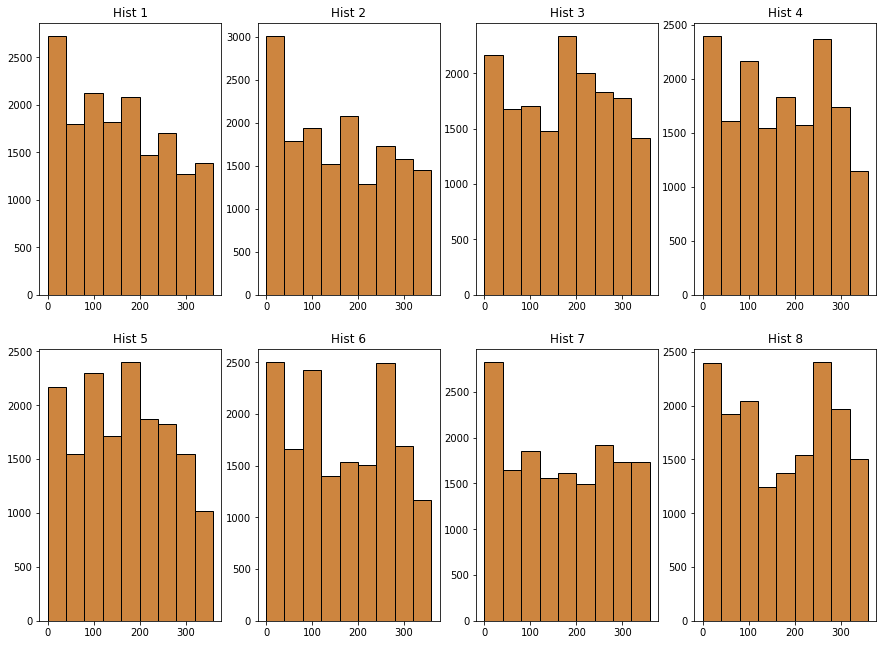

In [80]:
fig = plt.figure(figsize=(15, 11))
rows = 2
cols = 4
bins = [0, 40, 80, 120, 160, 200, 240, 280, 320, 360]
print (bins)

hist,_= np.histogram(d, bins = bins)
print (hist)
fig.add_subplot(rows, cols, 1)
plt.hist(d.ravel(),bins=bins, color='peru', ec = 'black')
plt.title("Hist 1")

hist,_= np.histogram(d2, bins = bins)
print (hist)
fig.add_subplot(rows, cols, 2)
plt.hist(d2.ravel(),bins=bins, color='peru', ec = 'black')
plt.title("Hist 2")

hist,_= np.histogram(d3, bins = bins)
print (hist)
fig.add_subplot(rows, cols, 3)
plt.hist(d3.ravel(),bins=bins, color='peru', ec = 'black')
plt.title("Hist 3")

hist,_= np.histogram(d4, bins = bins)
print (hist)
fig.add_subplot(rows, cols, 4)
plt.hist(d4.ravel(),bins=bins, color='peru', ec = 'black')
plt.title("Hist 4")

hist,_= np.histogram(d5, bins = bins)
print (hist)
fig.add_subplot(rows, cols, 5)
plt.hist(d5.ravel(),bins=bins, color='peru', ec = 'black')
plt.title("Hist 5")

hist,_= np.histogram(d6, bins = bins)
print (hist)
fig.add_subplot(rows, cols, 6)
plt.hist(d6.ravel(),bins=bins, color='peru', ec = 'black')
plt.title("Hist 6")

hist,_= np.histogram(d7, bins = bins)
print (hist)
fig.add_subplot(rows, cols, 7)
plt.hist(d7.ravel(),bins=bins, color='peru', ec = 'black')
plt.title("Hist 7")

hist,_= np.histogram(d8, bins = bins)
print (hist)
fig.add_subplot(rows, cols, 8)
plt.hist(d8.ravel(),bins=bins, color='peru', ec = 'black')
plt.title("Hist 8")


In [81]:
#regions
def create_regions(test_image,bloc_size_r,bloc_size_c):
    regions = []
    for r in range(0,test_image.shape[0], bloc_size_r):
        for c in range(0,test_image.shape[1], bloc_size_c):
            window = test_image[r:r+bloc_size_r,c:c+bloc_size_c]
            regions.append(window)
    return np.array(regions)

In [ ]:
# On cree des regions pour tous les images
bloc_size_r = 8
bloc_size_c = 8

regions = []
regions = create_regions(d,bloc_size_c,bloc_size_r)
print(regions)

regions2 = []
regions2 = create_regions(d2,bloc_size_c,bloc_size_r)
print(regions2)

regions3 = []
regions3 = create_regions(d3,bloc_size_c,bloc_size_r)
print(regions3)

regions4 = []
regions4 = create_regions(d4,bloc_size_c,bloc_size_r)
print(regions4)

regions5 = []
regions5 = create_regions(d5,bloc_size_c,bloc_size_r)
print(regions5)

regions6 = []
regions6 = create_regions(d6,bloc_size_c,bloc_size_r)
print(regions6)

regions7 = []
regions7 = create_regions(d7,bloc_size_c,bloc_size_r)
print(regions7)

regions8 = []
regions8 = create_regions(d8,bloc_size_c,bloc_size_r)
print(regions8)



In [83]:
def get_desc(regions):
    descriptor = []
    bins = [0, 45, 90, 135, 180, 225, 270, 315, 360]
    for r in regions :
        hist,_= np.histogram(r,bins = bins)
        descriptor.extend(hist)
    return descriptor

In [84]:
descriptor = get_desc(regions)
# print(descriptor)
descriptor2 = get_desc(regions2)
# print(descriptor2)
descriptor3 = get_desc(regions3)
# print(descriptor3)
descriptor4 = get_desc(regions4)
# print(descriptor4)
descriptor5 = get_desc(regions5)
# print(descriptor5)
descriptor6 = get_desc(regions6)
# print(descriptor6)
descriptor7 = get_desc(regions7)
# print(descriptor7)
descriptor8 = get_desc(regions8)
# print(descriptor8)

La difference de similarite entre l'image requete et image 2 = 124.826171875
La difference de similarite entre l'image requete et image 3 = 133.08203125
La difference de similarite entre l'image requete et image 4 = 104.1142578125
La difference de similarite entre l'image requete et image 5 = 153.5390625
La difference de similarite entre l'image requete et image 6 = 124.455078125
La difference de similarite entre l'image requete et image 7 = 128.625
La difference de similarite entre l'image requete et image 8 = 137.24609375
Le min est = 104.1142578125


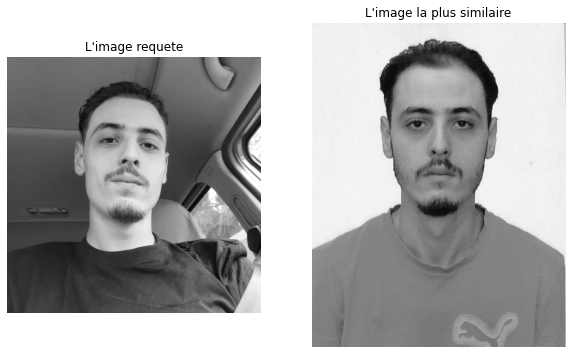

In [85]:
# Les calculs de tous les MSE entre l'image requete et les autres,on trouve le min et on affiche l'image la plus similaire a la fin
fig = plt.figure(figsize=(10, 7))
rows = 1
cols = 2

MSE = []
MSE.append(math.inf)
mse_1 = mean_squared_error(descriptor,descriptor2)
MSE.append(mse_1)
mse_2 = mean_squared_error(descriptor,descriptor3)
MSE.append(mse_2)
mse_3 = mean_squared_error(descriptor,descriptor4)
MSE.append(mse_3)
mse_4 = mean_squared_error(descriptor,descriptor5)
MSE.append(mse_4)
mse_5 = mean_squared_error(descriptor,descriptor6)
MSE.append(mse_5)
mse_6 = mean_squared_error(descriptor,descriptor7)
MSE.append(mse_6)
mse_7 = mean_squared_error(descriptor,descriptor8)
MSE.append(mse_7)

print( "La difference de similarite entre l'image requete et image 2 = " + str(mse_1))
print( "La difference de similarite entre l'image requete et image 3 = " + str(mse_2))
print( "La difference de similarite entre l'image requete et image 4 = " + str(mse_3))
print( "La difference de similarite entre l'image requete et image 5 = " + str(mse_4))
print( "La difference de similarite entre l'image requete et image 6 = " + str(mse_5))
print( "La difference de similarite entre l'image requete et image 7 = " + str(mse_6))
print( "La difference de similarite entre l'image requete et image 8 = " + str(mse_7))

print("Le min est = " + str(min(MSE)))
minIndex = MSE.index(min(MSE))

img_path = 'Images/1.jpg'
img = cv2.imread(img_path,0)
fig.add_subplot(rows, cols, 1)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title("L'image requete")

img_path = 'Images/'+str(minIndex+1)+'.jpg'
fig.add_subplot(rows, cols, 2)
imgSim = cv2.imread(img_path,0)
plt.axis('off')
plt.title("L'image la plus similaire")
plt.imshow(imgSim,cmap='gray')

In [86]:
# def click_event(event, x, y, flags, params):
#     clear_output(wait=True)
#     if event == cv2.EVENT_LBUTTONDOWN:
#         print(x, ' ', y)
#         region_x = math.floor(x/8)
#         region_y = math.floor(y/8)
#         print(region_x,region_y)
#         region = regions[(region_y*16) + region_x]
#         print(region)
#         bins = [0, 45, 90, 135, 180, 225, 270, 315, 360]
#         np.histogram(region, bins = bins)
#         hist, bins = np.histogram(region, bins = bins)
#         print (hist)
#         print (bins)
#         plt.hist(region.ravel(),bins=bins, color='peru', ec = 'black')
#         plt.show()

# cv2.imshow('Image',face1)
# cv2.setMouseCallback('Image',click_event)
# cv2.waitKey(0)
# cv2.destroyAllWindows()